In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The data can be downloaded through here:
https://www.kaggle.com/medharawat/google-stock-price

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/timeseriesmachinelearning/realstudies/realstudies1/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


Now, we create a data structure with 60 timesteps and one output as an Array of x_train and y_train.

In [ ]:
##Now, we create a data structure with 60 timesteps and one output as an Array of x_train and y_train.
##width(whereby each of them can cover 60 as width)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Here we have done reshaping of x_train data.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now, the following libraries are required for building the RNN model and perform its operations. We have imported the Keras library and its packages.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [ ]:
import keras

Let’s initialize our RNN.

In [ ]:
model = keras.Sequential()

Add two SimpleRNNlayer with one dense layer. To fully utilise the keras abritary expression, lamda is integrated in this prediction model.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(80, return_sequences=True),
  tf.keras.layers.SimpleRNN(80),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=5e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(X_train, y_train,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
38/38 [==============================] - 5s 87ms/step - loss: 23.1105 - mae: 23.6036
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 12.3327 - mae: 12.8327
Epoch 3/100
38/38 [==============================] - 3s 85ms/step - loss: 10.7009 - mae: 11.1969
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 4.7519 - mae: 5.2366
Epoch 5/100
38/38 [==============================] - 3s 78ms/step - loss: 14.6780 - mae: 15.1733
Epoch 6/100
38/38 [==============================] - 3s 81ms/step - loss: 7.3762 - mae: 7.8661
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 13.0943 - mae: 13.5857
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 7.3974 - mae: 7.8880
Epoch 9/100
38/38 [==============================] - 3s 81ms/step - loss: 29.9159 - mae: 30.4130
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 36.0073 - mae: 36.5051
Epoch 11/100
38/38 [===============

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/timeseriesmachinelearning/realstudies/realstudies1/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting prediction in 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


The final step is to visualize our data results using the matplotlib library.

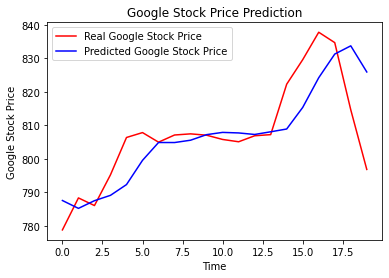

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Evaluation metrice

In [ ]:
tf.keras.metrics.mean_absolute_error(predicted_stock_price, real_stock_price).numpy()

array([ 8.77776855,  3.12159668,  1.45527832,  6.12700439, 14.05893555,
        8.28285156,  0.09960938,  2.24968018,  1.89595459,  0.16536133,
        2.10821289,  2.63561523,  0.38907227,  0.84686279, 13.37086182,
       14.25421631, 13.57885986,  3.4153833 , 19.09256348, 29.0941626 ])

In [ ]:
# calculate MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print(' mean_absolute_error: %.6f' % mae)

 mean_absolute_error: 7.250993


**More works will be done for improving the model including adapting the LSTM model.**Thank you! 
